# Reference for the Discrete Fourier Transform


$\tilde{X}$ subscript is $k$, $\tilde{x}$ subscript is $n$.


Forward transform:


$$X_k = \sum_{n = 0}^{N-1} x_n \cdot e^{-i\frac{2 \pi}{N} \cdot n \cdot k}$$


Inverse transform:


$$x_k = \frac{1}{N} \sum_{n = 0}^{N-1} X_n \cdot e^{+i\frac{2 \pi}{N} \cdot n \cdot k}$$



# Constituent waves: Reconstructing $\tilde{x}$


Before we can get to 'what is the point?' for the Fourier Transform we
have to hang in there with the nuts and bolts to understand 
the Stanford lecture idea that Fourier machinery has two parts:
Analysis and Synthesis. Reconstructing $\tilde{x}$ is about the Synthesis.


The claim is that $\tilde{x}$ can be understood as the sum of 
constituent *sine* and constituent  
*cosine* waves. 
The calculation below demonstrates that this is so.


***Aside 1:*** Notice that we have this identity from our trig days, taking $x$
to be a variable and $\alpha$ to be some constant: 


$$\sin(x + \alpha) = \sin x \cdot \cos \alpha + \cos x \cdot \sin \alpha = A \cdot \sin x  + B \cdot \cos x$$.


This can be interpreted 'in retrograde' to mean: 
Adding a sine and a cosine together -- 
weighted properly with $A$ and $B$ -- is equivalent to a single 
sine wave shifted by a phase, parameter $\alpha$. 


***Aside 2:*** A 'set of constituent waves' is analogous to the linear algebra 
concept of basis vectors. A sine wave with some period corresponds
to $\hat{i}$ and a different one, say a shorter-period sine wave,
corresponds to $\hat{j}$.
In applied math: Often $\tilde{x}$ will have dozens or hundreds or thousands of values,
a very large number of dimensions compared to what we are accustomed to with 2-D linear 
algebra.


Ok back to business: Reconstructing $\tilde{x}$ 
from constituent sine and cosine waves. 


The height of each of these waves is moderated by a coefficient:
A multiplier to set its amplitude. For example $3 \cdot \sin x$
has an amplitude of 3. 
Each constituent wave has its own coefficient. These coefficients
are what is contained in the vector $\tilde{X}$, 
the Fourier Transform of $\tilde{x}$. 



- $\tilde{X}$ is the *forward* Fourier Transform (FT) of some vector of real numbers $\tilde{x}$.
- $\tilde{x}$ can be reconstructed by applying the *inverse* FT to $\tilde{X}$.
- The *inverse* differs from the *forward* by a leading $\frac{1}{N}$ and by
a $+$ sign in the complex exponential; which makes the imaginative sine
function positive rather than negative. (Very mysterious!) 
- For each $x_n$ the reconstruction calculation is $\frac{1}{N}$ times a sum over a $k$ index.
    - This $k$ takes values $0, 1, 2, \dots, N-1$. 
    - The argument of the sum is $X_k$ multiplied by $w_{k, n}$. 
        - Let's digress for a moment: Here $w$ is
a complex exponential; and as it has two indices it 
can be represented as a square $N \times N$ matrix;
a linear transform in the grand scheme of $\tilde{x} = w \tilde{X}$.
    - $w_{k, n} = \cos(\alpha) + i \sin(\alpha)$ where $\alpha = \frac{2 \pi k n}{N}$.
    - As $w_{k, n}$ is a complex number, the calculation is a sum 
over $N$ products of two complex numbers $X_k$ and $w_{k, n}$.


So let's take a moment to restate the premise here for the sake of familiarity.


- For any index $n$ the value of the $\tilde{x}$ component $x_n$ is 
$1/N$ times a sum of $N$ products
- Let us look more closely to break this *product* down in terms of knowns
    - Picture the graph of the $N$ values of $\tilde{x}$.
        - Each point $x_i$ is a sum of $N$ complex products


The goal of the code is to graph the constituent sine and cosine waves


- Each wave has a characteristic period
- Each wave has a characteristic amplitude
- There are $2 \times N$ such waves: $N$ sines and $N$ cosines
- Their sum is advertised as being equal to $\tilde{x}$.


Skeleton code: The code below is some working Python mixed with
some English. Convert the English to Python and see how it goes.
It presumes there is a forward Discrete Fourier Transform function
**`DFT(x)`** that returns five arguments: **`Xr, Xi, Xd, Xa, N`**.


```
fig, axs = plt.subplots(3, figsize=(10,12))

# Let's design x to be a square wave for starters

nquarter = 20
x = [-.5]*nquarter
x = x + [0.5]*nquarter*2
x = x + [-.5]*nquarter
x.append(-.5)                   # life is simpler if our vector x has odd length

Xr, Xi, Xd, Xa, N = DFT(x)

nWavesToPlot = 3          # start by showing the first 3 sine and cosine waves

sum_wave = [0.]*N         # sum_wave is just what it sounds like... will it look like x?

for k in range(nWavesToPlot):
    initialize two empty lists: to be the next waves
    for n in range(N):
        append a value to list 1     # real part only; ignore the imaginative for now
        append a value to list 2     # real part only; ditto
    plot list 1 on axs[0]
    plot list 2 on axs[1]
    add these waves to sum_wave; here is one way to do this:
    sum_wave = [sum(c) for c in zip(sum_wave, [sum(c) for c in zip(coswave, sinwave)])] 

plot sum_wave on axs[2]

fig.show()
```


Later: Verify the reconstructed $\tilde{x}$ has Zeros in its imaginative part.

/tmp/ipykernel_298/4113715169.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


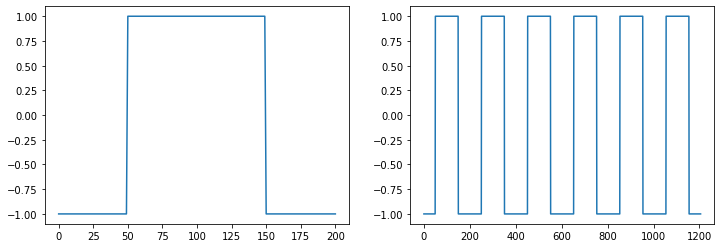

In [1]:
from matplotlib import pyplot as plt
from math import pi, sin, cos, sqrt, atan2
from random import randint, random
from numpy import arange
import numpy as np
import matplotlib.image as mpimg
from numpy.fft import fft2, ifft2
from numpy import abs as magnitude

fig,axs=plt.subplots(1,2, figsize=(12, 4))

x = [1, 2, 3, 5, 2, 4, -2, -1]

x = [randint(0,10)-5 for i in range(100)]

x, segment = [], 50

low = -1.
high = 1.
for i in range(segment): x.append(low)
for i in range(2*segment): x.append(high)
for i in range(segment): x.append(low)
x.append(low)   # making N odd results in a cleaner FT

x_rep = x + x + x + x + x + x

axs[0].plot(x)
axs[1].plot(x_rep)
fig.show()

In [2]:
# should really take xr, xi arguments dontcha know
def ForwardDFT(x):
    N = len(x)
    Xr, Xi, Xd, Xa = [], [], [], []
    for k in range(N):
        Xreal, Ximag = 0., 0.
        for n in range(N):
            arg = (2*pi/N)*k*n
            Xreal += cos(arg)*x[n]
            Ximag -= sin(arg)*x[n]
        Xr.append(Xreal)
        Xi.append(Ximag)
        Xd.append(sqrt(Xreal*Xreal + Ximag*Ximag))
        phase = atan2(Ximag, Xreal)
        if phase > pi:  phase -= 2*pi
        if phase < -pi: phase += 2*pi
        Xa.append(phase)
    return Xr, Xi, Xd, Xa, N

# not tested yet... probably ok
def InverseDFT(Xr, Xi):
    N = len(Xr)
    if not len(Xi) == N: print("uh oh in inverse DFT")
    xr, xi, xd, xa = [], [], [], []
    for n in range(N):
        xreal, ximag = 0., 0.
        for k in range(N):
            arg = (2*pi/N)*k*n
            xreal += cos(arg)*Xr[n] - sin(arg)*Xi[n]
            ximag += sin(arg)*Xr[n] + cos(arg)*Xi[n]
        xr.append(xreal/N)
        xi.append(ximag/N)
        xd.append(sqrt(xreal*xreal + ximag*ximag))
        phase = atan2(ximag, xreal)
        if phase > pi:  phase -= 2*pi
        if phase < -pi: phase += 2*pi
        xa.append(phase)
    return xr, xi, xd, xa, N

In [3]:
# this version sums + and - frequency elements together
def PSD(Xr, Xi):
    '''Power Spectral Density'''
    N = len(Xr)
    if not len(Xi) == N: print("uh oh in PSD")
    ps = [Xr[0]**2 + Xi[0]**2]
    for i in range(1, (N+1)//2):
        conj_ix = N - i
        ps.append(Xr[i]**2 + Xi[i]**2 + Xr[conj_ix]**2 + Xi[conj_ix]**2)
    if not N % 2: ps.append(Xr[N//2]**2 + Xi[N//2]**2)
    return ps



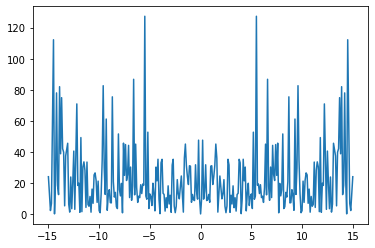

In [4]:
# stack overflow example
from __future__ import division
data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2
time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])

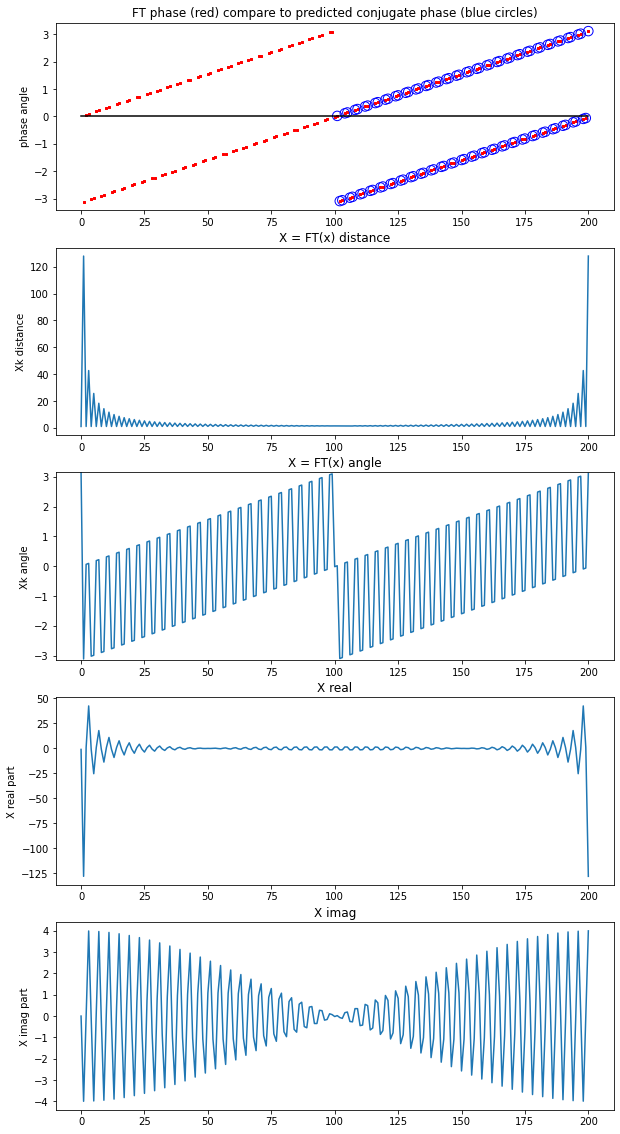

In [5]:
fig,axs=plt.subplots(5,1,figsize=(10, 20))

Xr, Xi, Xd, Xa, N = ForwardDFT(x)

pc, pcx, refl, reflx = [], [], [], []

for i in range((N-1)//2):
    
    # both negative and positive sweep directions
    pc.append(Xa[(i+1)])
    pc.append(Xa[N-(i+1)])
    
    # corresponding indices (become x-coordinates)
    pcx.append(i+1)
    pcx.append(N-(i+1))
    
    # reflect: uses only the negative sweeps
    #   Each sweep Xn has a phase angle
    #   We predict the corresponding opposite sweep has the negative of this phase
    #   These are called to conjugate phase (predicts the 
    refl.append(-Xa[(i+1)])
    reflx.append(N-i-1)
    
axs[0].scatter(pcx, pc, s=4, marker=',', color='r')
axs[0].scatter(reflx, refl, s=90, facecolors='none', edgecolors='b')
axs[0].plot([0, N-1], [0, 0], color='k')
    
axs[1].plot(Xd)
axs[2].plot(Xa)
axs[3].plot(Xr)
axs[4].plot(Xi)

axs[0].set(ylabel = 'phase angle', 
           title='FT phase (red) compare to predicted conjugate phase (blue circles)')
axs[1].set(ylabel = 'Xk distance', title='X = FT(x) distance')
axs[2].set(ylabel = 'Xk angle',    title='X = FT(x) angle', ylim=(-pi, pi))
axs[3].set(ylabel = 'X real part', title='X real')
axs[4].set(ylabel = 'X imag part', title='X imag')

plt.show()

# axs[2][1].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
# axs[2][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)

## Reconstruct $\tilde{x}$: What is the calculation?


For the real sum of sine and cosine waves we have $N$ values of $X$. Fix the index as $k$. 


A particular $n$ corresponds to a point along the x-axis of the sine/cosine wave. Or more
properly the *n-axis*. 


For a given $k$ and a given $n$ we are interested in 


$$Re \left( \frac{1}{N} \left( (X_{r} + i X_{i})_k \cdot (\cos{\frac{2 \pi n k}{N}} + i sin{\frac{2 \pi n k}{N}}) \right) \right)$$





/tmp/ipykernel_298/2405670242.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


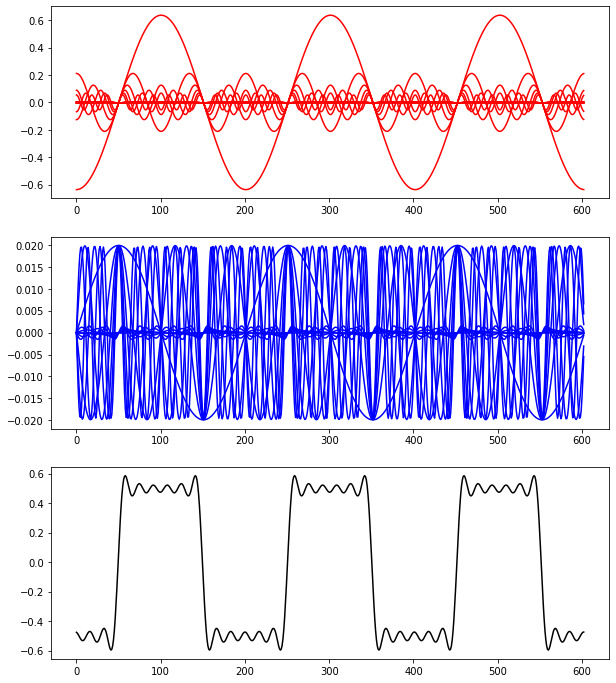

In [6]:
fig,axs=plt.subplots(3, figsize=(10, 12))
nWaveforms = 12
nCopies = 3
sumwave = [0.]*N*nCopies
for k in range(nWaveforms):
    Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
    for n in range(N*nCopies):
        coswave.append((1/N)*Xkr*(cos(2*pi*n*k/N)))
        sinwave.append((1/N)*Xki*(-sin(2*pi*n*k/N)))
    axs[0].plot(coswave, color='r')
    axs[1].plot(sinwave, color='b')
    sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
axs[2].plot(sumwave, color='k')
fig.show()

# Reconstruct the imaginative part of $\tilde{x}$

What about the $i$ part? The rainbows have spoken; pure imaginative:
$i \cdot \frac{1}{N}(X_r \cdot sin{\frac{2 \pi n k}{N}} + X_i \cdot \cos{\frac{2 \pi n k}{N}})$

N =  201
Using these k:  [0, 1, 200, 2, 199]


/tmp/ipykernel_298/3843613678.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


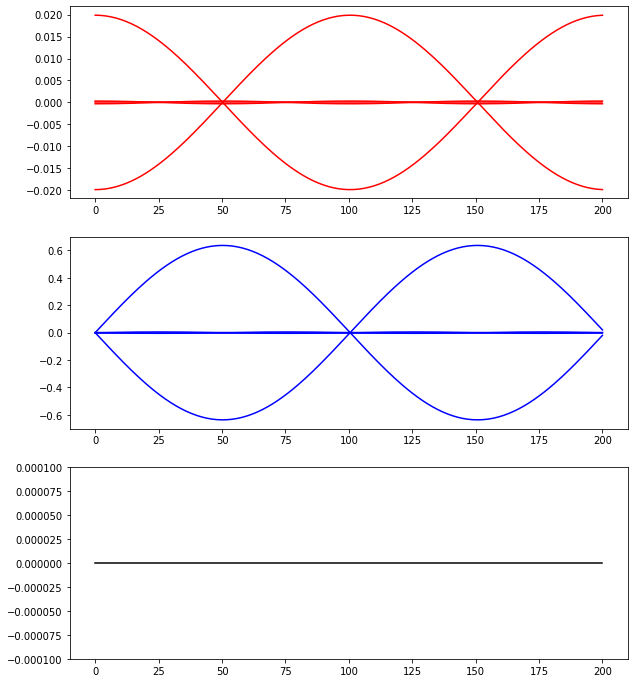

In [7]:
fig,axs=plt.subplots(3, figsize=(10, 12))
nWaveformPairs = 2
waveform_indices = [0]
for i in range(nWaveformPairs):
    waveform_indices.append(i + 1)
    waveform_indices.append(N-1-i)
    
print("N = ", N)
print("Using these k: ", waveform_indices)

sumwave = [0.]*N
for k in waveform_indices:
    Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
    for n in range(N):
        sinwave.append((1/N)*Xkr*sin(2*pi*n*k/N))
        coswave.append((1/N)*Xki*cos(2*pi*n*k/N))
    axs[0].plot(coswave, color='r')
    axs[1].plot(sinwave, color='b')
    sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
axs[2].plot(sumwave, color='k')
axs[2].set(ylim=(-0.0001,0.0001))
fig.show()

This is supposed to be zero for all $n$ since $\tilde{x}$ is real and this is the reconstructed imaginative part of $\tilde{x}$.

In [8]:
# task: describe the three functions in this cell

# FourierPlot taks a real vector x; produces a series of plots
#   - x
#   - power spectrum ( FT (x) )
#   - pairs of charts for list nWaveforms = [3, 10, etc up to N]
#       - red cosine waves, blue sine waves
#       - composition from 0, 1, ..., nWaveforms[w]-1
#
# Issue: The reconstruction order is biased in going low - high - low(opposite) order

def FourierPlot(x, nCopies, nWaveforms = [10]):
    nWaveY = (max(x) + min(x))/2
    Xr, Xi, Xd, Xa, N = ForwardDFT(x)                            # from real x > DFT(x)
    nCharts = 1 + 1 + 2*len(nWaveforms)
    fig,axs=plt.subplots(nCharts, figsize=(8, 3*nCharts))
    axs[0].plot(x)
    axs[1].plot(PSD(Xr, Xi))
    for w in range(len(nWaveforms)):
        sumwave = [0.]*N*nCopies
        for k in range(nWaveforms[w]):
            Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
            for n in range(N*nCopies):
                coswave.append((1/N)*Xkr*(cos(2*pi*n*k/N)))
                sinwave.append((1/N)*Xki*(-sin(2*pi*n*k/N)))
            axs[2 + 2*w].plot(coswave, color='r')
            axs[2 + 2*w].plot(sinwave, color='b')
            sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
        axs[2 + 2*w + 1].plot(sumwave, color='k')
        axs[2 + 2*w + 1].text(0, nWaveY, str(nWaveforms[w]))
    fig.show()
    
def Sinewave(n, omega, phi): return [sin(omega*i+phi) for i in range(n)]

def Noise(x, a, b): return([a*random() + b + x[i] for i in range(len(x))])

/tmp/ipykernel_298/2433470097.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


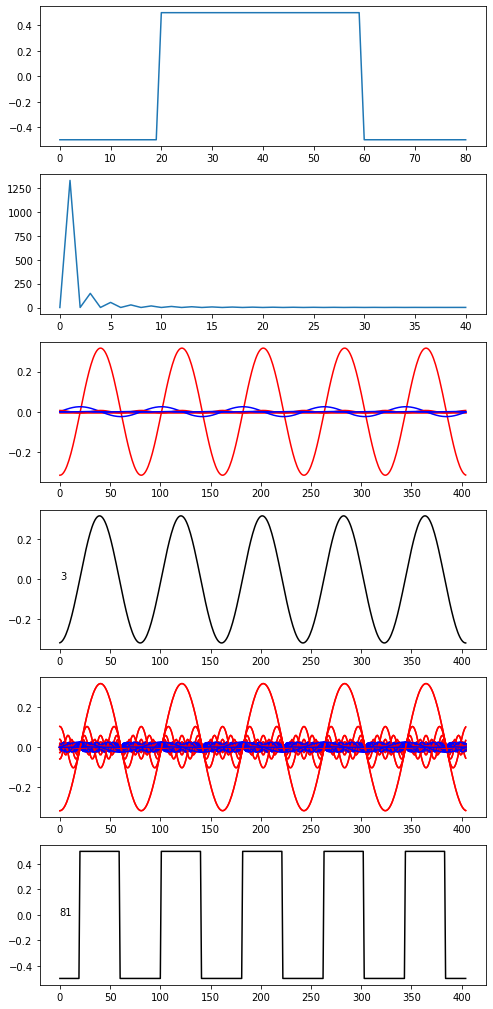

In [9]:
x, segment = [], 20

low = -.5
high = .5
for i in range(segment): x.append(low)
for i in range(2*segment): x.append(high)
for i in range(segment): x.append(low)
x.append(low)
nCopies = 5
nWaveforms = [3, 81]                           # 6, 10, 30, 60, 61, 80, 
FourierPlot(x, nCopies, nWaveforms) 

/tmp/ipykernel_298/2433470097.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


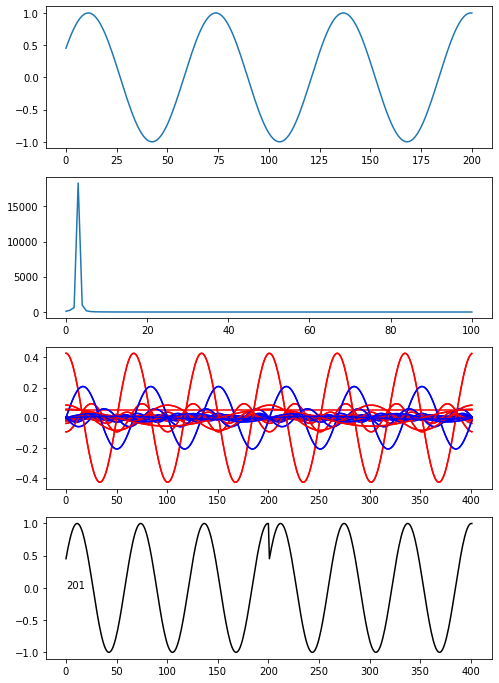

In [10]:
nPts = 201
x = Sinewave(nPts, .1, .47)
nCopies = 2
nWaveforms = [nPts]                           # 6, 10, 30, 60, 61, 80, 
FourierPlot(x, nCopies, nWaveforms) 

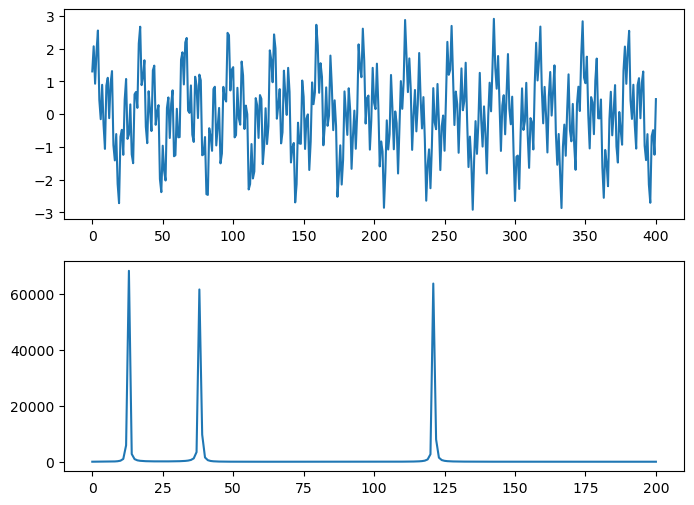

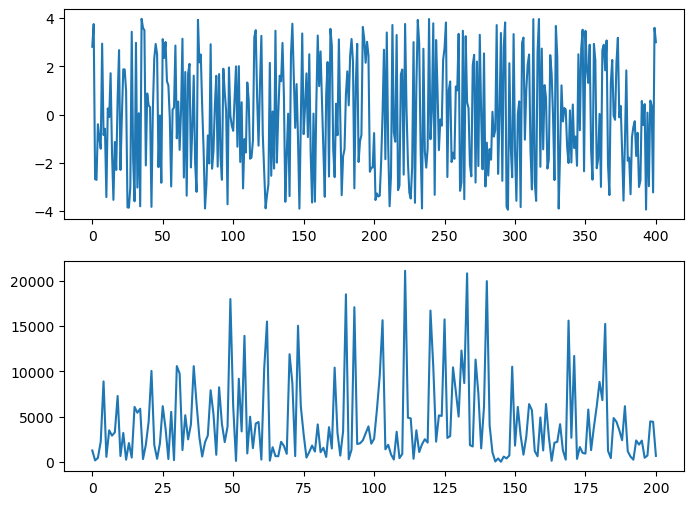

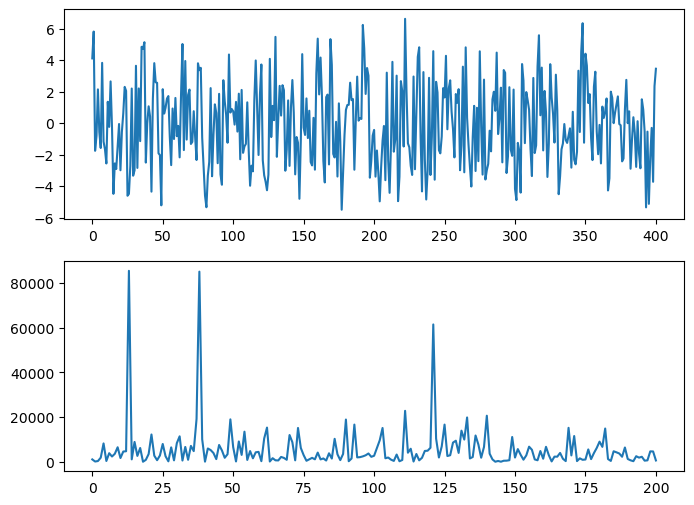

In [24]:
# task: Suppose your friend Caprice claims that the Fourier Transform is a linear function. 

n = 401

freqs = [1.9, .6, .2]
x = [0.]*n
for i in range(len(freqs)):
    s = Sinewave(n, freqs[i], random())
    x = [sum(c) for c in zip(x, s)]

y = Noise([0.]*n, 8, -4)
z = [sum(c) for c in zip(x, y)]


FourierPlot(x, 1, [])
FourierPlot(y, 1, [])
FourierPlot(z, 1, [])

LTI...

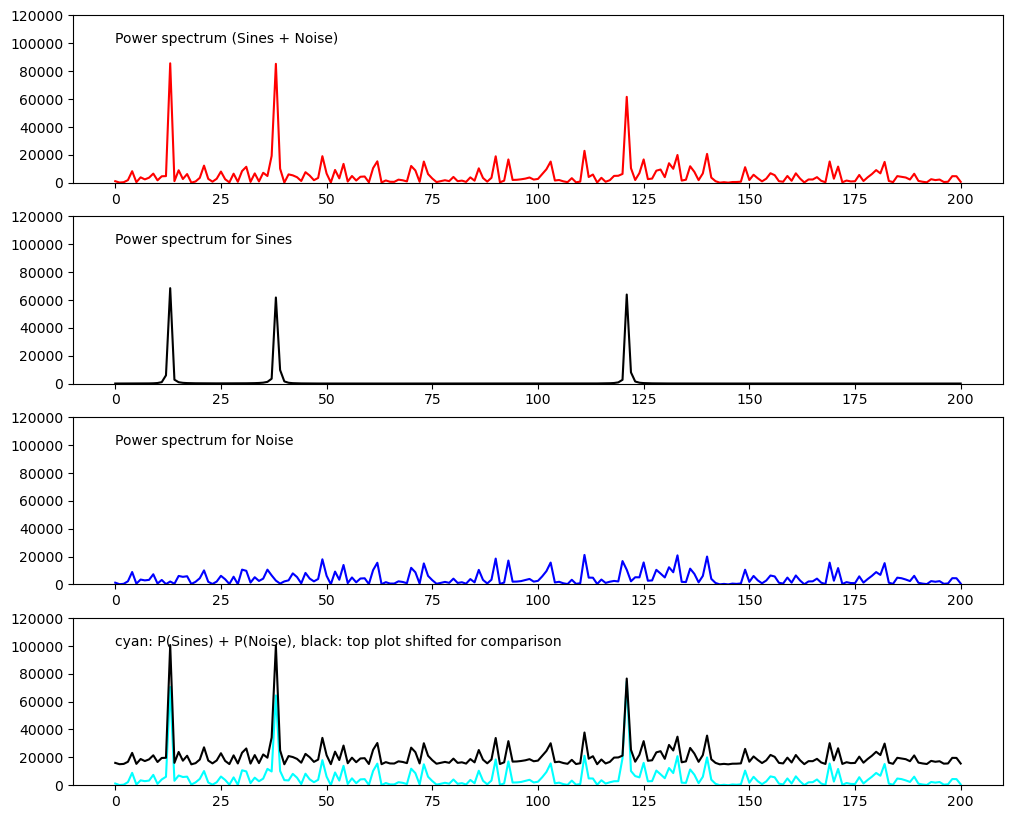

In [26]:
# What is your opinion of Caprice's claim?

xXr, xXi, xXa, xXp, N = ForwardDFT(x)
yXr, yXi, yXa, yXp, N = ForwardDFT(y)
zXr, zXi, zXa, zXp, N = ForwardDFT(z)

xp = PSD(xXr, xXi)
yp = PSD(yXr, yXi)
xp_add_yp = [sum(c) for c in zip(xp, yp)]
zp = PSD(zXr, zXi)
zp_shift = [z+15000. for z in zp]



fig,axs=plt.subplots(4, figsize=(12,10))
axs[0].plot(zp, color='r')
axs[1].plot(xp, color='k')
axs[2].plot(yp, color='b')
axs[3].plot(xp_add_yp, color='cyan')
axs[3].plot(zp_shift, color='k')
for i in range(4): axs[i].set(ylim=(0,120000))
axs[0].text(0, 100000, 'Power spectrum (Sines + Noise)')
axs[1].text(0, 100000, 'Power spectrum for Sines')
axs[2].text(0, 100000, 'Power spectrum for Noise')
axs[3].text(0, 100000, 'cyan: P(Sines) + P(Noise), black: top plot shifted for comparison ')
fig.show()


In [134]:
!ls *.png

diagonals.png  pink_flower.png	robs_image3.png  robs_image6.png
image.png      robs_image.png	robs_image4.png  robs_image7.png
image2.png     robs_image2.png	robs_image5.png  robs_image8.png


/tmp/ipykernel_298/1829992993.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


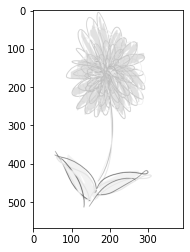

In [11]:
def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('./image.png')
img = rgb2gray(img)
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
fig.show()

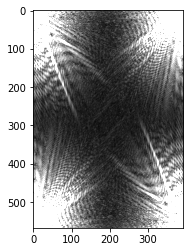

In [12]:
f = magnitude(fft2(img))
plt.imshow(f, cmap=plt.get_cmap('gray'), vmin=0, vmax=30)

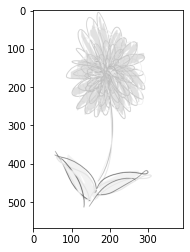

In [13]:
f = magnitude(ifft2(fft2(img)))
plt.imshow(f, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

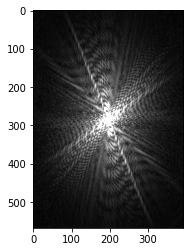

In [14]:
ft = magnitude(fft2(img))
ft_center = ft.copy()
h = len(ft)
w = len(ft[0])

def map(i, j, w, h):
    w2 = w // 2
    h2 = h // 2
    w2p = w2 if not w % 2 else w2 + 1
    h2p = h2 if not h % 2 else h2 + 1
    if i < h2p: k = i + h2
    else: k = i - h2p
    if j < w2p: l = j + w2
    else: l = j - w2p
    return k, l

for i in range(h):
    for j in range(w):
        k, l = map(i, j, w, h)
        ft_center[i][j] = ft[k][l]

plt.imshow(ft_center, cmap=plt.get_cmap('gray'), vmin=0, vmax=100)